In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [47]:
medical_data = pd.read_csv("Medicalpremium.csv")
medical_data.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000  
2                       1         23000  
3                       2         28000  
4                       1         23000

In [48]:
medical_data.shape

(986, 11)

In [49]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [50]:
medical_data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [51]:
medical_data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [52]:
medical_data.describe()

Age    Diabetes  BloodPressureProblems  AnyTransplants  \
count  986.000000  986.000000             986.000000      986.000000   
mean    41.745436    0.419878               0.468560        0.055781   
std     13.963371    0.493789               0.499264        0.229615   
min     18.000000    0.000000               0.000000        0.000000   
25%     30.000000    0.000000               0.000000        0.000000   
50%     42.000000    0.000000               0.000000        0.000000   
75%     53.000000    1.000000               1.000000        0.000000   
max     66.000000    1.000000               1.000000        1.000000   

       AnyChronicDiseases      Height      Weight  KnownAllergies  \
count          986.000000  986.000000  986.000000      986.000000   
mean             0.180527  168.182556   76.950304        0.215010   
std              0.384821   10.098155   14.265096        0.411038   
min              0.000000  145.000000   51.000000        0.000000   
25%              0.000000  161.000000   67.000000        0.000000   
50%              0.000000  168.000000   75.000000        0.000000   
75%              0.000000  176.000000   87.000000        0.000000   
max              1.000000  188.000000  132.000000        1.000000   

       HistoryOfCancerInFamily  NumberOfMajorSurgeries  PremiumPrice  
count               986.000000              986.000000    986.000000  
mean                  0.117647                0.667343  24336.713996  
std                   0.322353                0.749205   6248.184382  
min                   0.000000                0.000000  15000.000000  
25%                   0.000000                0.000000  21000.000000  
50%                   0.000000                1.000000  23000.000000  
75%                   0.000000                1.000000  28000.000000  
max                   1.000000                3.000000  40000.000000

<Figure size 1000x1000 with 0 Axes>

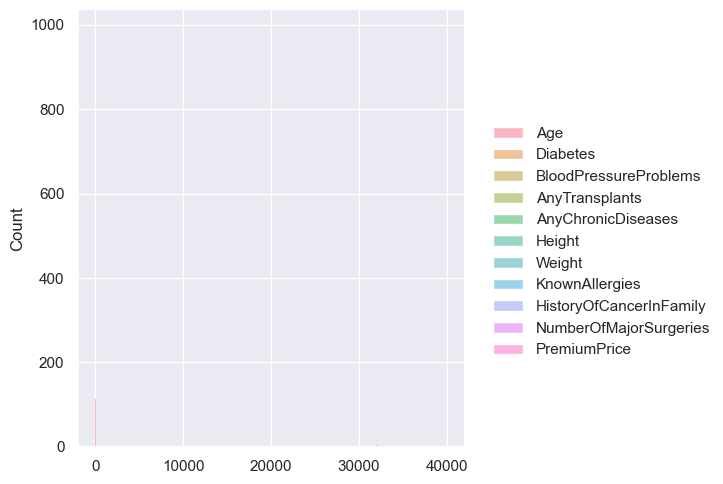

In [53]:
plt.figure(figsize=(10,10))
sns.displot(medical_data,label='medical_data')


C:\Users\khadeer\AppData\Local\Temp\ipykernel_4180\3553218356.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_data['Age'])


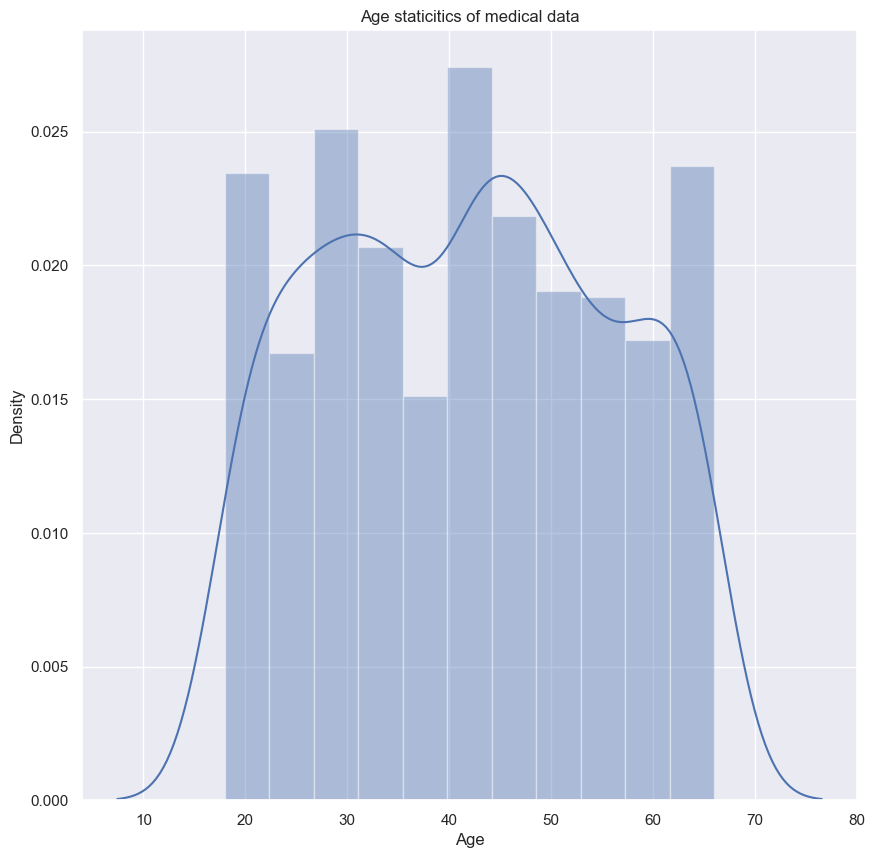

In [54]:
sns.set()
plt.figure(figsize=(10,10))
sns.distplot(medical_data['Age'])
plt.title('Age staticitics of medical data')
plt.show()

In [55]:
x = medical_data.drop('PremiumPrice',axis=1)
y = medical_data['PremiumPrice']

In [56]:
# split the data by train and test data
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
medical_data.shape , x_train.shape , x_test.shape

((986, 11), (788, 10), (198, 10))

In [57]:
regressor = LinearRegression()

In [58]:
regressor.fit(x_train,y_train)

LinearRegression()

In [59]:
lin_reg_pred = regressor.predict(x_train)
lin_reg_pred

array([14822.85960748, 21050.20422402, 28508.26090637, 20876.08763975,
       19243.55063259, 30530.22231791, 21149.14137947, 36660.34535315,
       19365.24152169, 22287.30496328, 29233.96768088, 28056.5091345 ,
       35670.0523498 , 19548.31394697, 28384.97395712, 29563.26485431,
       26151.38124443, 30552.28317571, 26673.01625916, 21269.28105699,
       21623.01903832, 28687.91729471, 29434.8817703 , 17455.17470122,
       29085.33486923, 28641.17324116, 29517.23546402, 17673.67884475,
       30356.76128408, 21525.47835929, 19648.83032495, 32859.49932351,
       30440.89147737, 16962.98912994, 33614.31475409, 21738.49136395,
       17961.42282569, 18816.81035466, 29873.02743252, 24297.16610562,
       32974.89050896, 25216.79092979, 30268.85453017, 22859.4101129 ,
       28595.8599996 , 23668.89022636, 22604.7609505 , 17485.18878408,
       27750.08272905, 23473.64122378, 20019.10006718, 18964.00268642,
       18766.8357928 , 23261.37646479, 28133.46572998, 24398.23039244,
      

In [60]:
#evaliuate and find teh error in it
error_train = metrics.r2_score(y_train,lin_reg_pred)
error_train

0.6219256563245064

In [61]:
mean_error_train  = metrics.mean_absolute_error(y_train,lin_reg_pred)
mean_error_train

2692.4716871413652

In [62]:
# for testing data 
lin_reg_pred_test = regressor.predict(x_test)
# lin_reg_pred
#evaliuate and find teh error in it
error_train = metrics.r2_score(y_test,lin_reg_pred_test)
error_train

0.713394427027874

# input the data by predictive sysytem  ,lets start the game 

In [63]:
input  = (24,0,0,0,0,178,57,1,0,1)

input_array = np.asarray(input)

input_reshape = input_array.reshape(1,-1)

reg = regressor.predict(input_reshape) 
print("our data output is: - " , reg[0])

our data output is: -  15959.181710835868


C:\Users\khadeer\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
